In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


In [9]:
df = pd.read_csv(r"C:\Users\Keshavi\Downloads\50_Startups (1).csv")
df

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [10]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [12]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [13]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


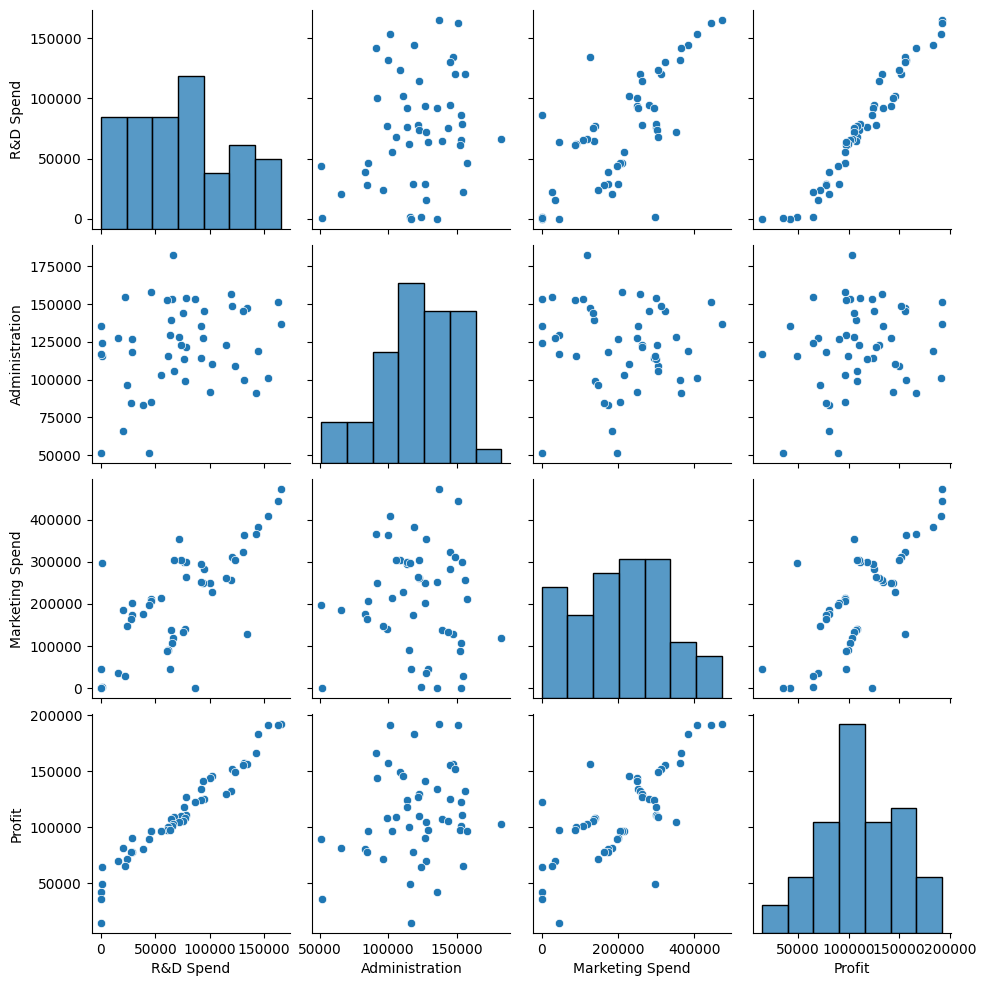

In [14]:
sns.pairplot(df)

In [15]:
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']
X
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled
X_test_scaled


array([[ 0.30245367,  0.52942836,  0.14916233],
       [-0.82734624, -1.40769369, -0.53560477],
       [-0.33181874, -0.20294703, -1.27505783],
       [-1.62147425,  0.11103854, -2.06176266],
       [ 0.35879726,  0.88291223,  0.41286919],
       [-1.63116196, -2.56004955, -2.07854935],
       [-0.04987791,  0.84817808, -0.89664846],
       [-0.2753597 ,  0.67912498, -0.86215204],
       [-0.30191325,  0.29793642, -1.67222209],
       [ 0.18462534,  1.19412269, -2.07854935]])

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_lr


array([126703.02716461,  84894.75081556,  98893.41815974,  46501.70815036,
       129128.39734381,  50992.69486261, 109016.5536578 , 100878.4641454 ,
        97700.59638629, 113106.15292226])

In [19]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)

y_pred_poly = poly_lr.predict(X_test_poly)


In [20]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


In [21]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [22]:
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

y_pred_svr = svr.predict(X_test_scaled)


In [23]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"Performance of {model_name}:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score:", r2_score(y_true, y_pred))
    print("-" * 50)

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_poly, "Polynomial Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svr, "SVR")

Performance of Linear Regression:
MAE: 6979.152252370404
MSE: 80926321.22295168
RMSE: 8995.90580336142
R² Score: 0.900065308303732
--------------------------------------------------
Performance of Polynomial Regression:
MAE: 7506.0645990141
MSE: 90304882.32826571
RMSE: 9502.888104585138
R² Score: 0.8884838648567716
--------------------------------------------------
Performance of Decision Tree:
MAE: 13755.663999999995
MSE: 400026479.25494
RMSE: 20000.66197041838
R² Score: 0.5060133431179846
--------------------------------------------------
Performance of Random Forest:
MAE: 6437.497739999977
MSE: 72625008.62306513
RMSE: 8522.030780457504
R² Score: 0.9103164738430438
--------------------------------------------------
Performance of SVR:
MAE: 22846.725399616513
MSE: 955620367.2803555
RMSE: 30913.10995808017
R² Score: -0.18008115702844907
--------------------------------------------------


In [24]:
models = {
    "Linear Regression": y_pred_lr,
    "Polynomial Regression": y_pred_poly,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "SVR": y_pred_svr
}

best_model = max(models, key=lambda m: r2_score(y_test, models[m]))
print(f"The best model is: {best_model}")


The best model is: Random Forest


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate the original model before tuning
mae_before = mean_absolute_error(y_test, y_pred_rf)
rmse_before = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_before = r2_score(y_test, y_pred_rf)

print(f"Before Tuning -> MAE: {mae_before}, RMSE: {rmse_before}, R² Score: {r2_before}")


Before Tuning -> MAE: 6437.497739999977, RMSE: 8522.030780457504, R² Score: 0.9103164738430438


In [26]:


# Compare actual vs. predicted values
predictions_df = pd.DataFrame({'Actual Profit': y_test, 'Predicted Profit': y_pred_rf})
print(predictions_df.head())  # Show first few comparisons


    Actual Profit  Predicted Profit
13      134307.35       133831.6871
39       81005.76        89192.0856
30       99937.59       100239.4889
45       64926.08        44157.3419
17      125370.37       131047.2193


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [28]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt',"log2",None]
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='r2', verbose=2)

In [29]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [30]:
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_features=None, n_estimators=300, random_state=42)

In [31]:
y_pred_best_rf = best_rf.predict(X_test)

In [32]:
mae_after = mean_absolute_error(y_test, y_pred_best_rf)
rmse_after = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_after = r2_score(y_test, y_pred_best_rf)

print(f"After Tuning -> MAE: {mae_after}, RMSE: {rmse_after}, R² Score: {r2_after}")

After Tuning -> MAE: 6357.485886666648, RMSE: 8777.178647815035, R² Score: 0.9048658692545767


In [33]:
print("Comparison of Model Performance:")
print(f"MAE Before: {mae_before:.2f}  |  MAE After: {mae_after:.2f}")
print(f"RMSE Before: {rmse_before:.2f}  |  RMSE After: {rmse_after:.2f}")
print(f"R² Score Before: {r2_before:.4f}  |  R² Score After: {r2_after:.4f}")


Comparison of Model Performance:
MAE Before: 6437.50  |  MAE After: 6357.49
RMSE Before: 8522.03  |  RMSE After: 8777.18
R² Score Before: 0.9103  |  R² Score After: 0.9049


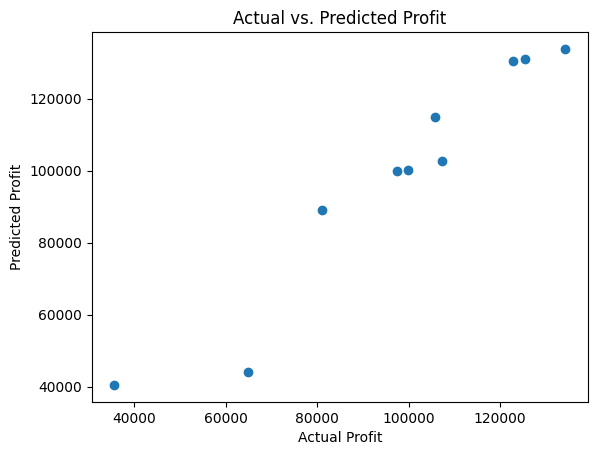

In [34]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs. Predicted Profit")
plt.show()

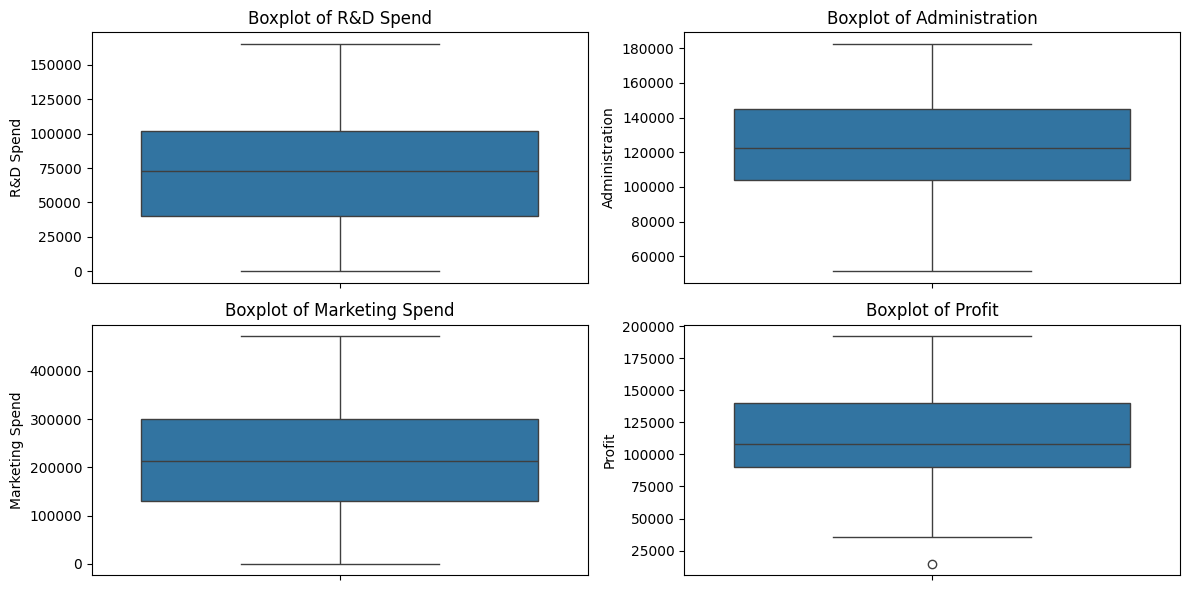

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features
num_features = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

# Plot boxplots
plt.figure(figsize=(12,6))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


In [36]:
import sys
print(sys.version)


3.12.6 (tags/v3.12.6:a4a2d2b, Sep  6 2024, 20:11:23) [MSC v.1940 64 bit (AMD64)]


In [37]:
! pip install xgboost


In [38]:
import xgboost
print(xgboost.__version__)


2.1.4


In [39]:
from xgboost import XGBRegressor


In [40]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R² Score:", r2_score(y_test, y_pred_xgb))


XGBoost Performance:
MAE: 7131.148554687502
RMSE: 9697.9116561403
R² Score: 0.8838597047993108


In [41]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

# Perform Randomized Search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    scoring="neg_mean_squared_error",
    cv=5,
    n_iter=50,  # Reduce iterations for faster results
    verbose=2,
    n_jobs=-1
)

# Fit the model
rf_random.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", rf_random.best_params_)

# Train Random Forest with the best parameters
best_rf = RandomForestRegressor(**rf_random.best_params_, random_state=42)
best_rf.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20}


RandomForestRegressor(max_depth=20, max_features=None, n_estimators=500,
                      random_state=42)

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Train the model with best parameters
best_rf = RandomForestRegressor(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    max_depth=10,
    random_state=42
)

best_rf.fit(X_train, y_train)

# Predict
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

MAE_rf = mean_absolute_error(y_test, y_pred_rf)
RMSE_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
R2_rf = r2_score(y_test, y_pred_rf)

print(f"Fine-Tuned Random Forest Performance:")
print(f"MAE: {MAE_rf}")
print(f"RMSE: {RMSE_rf}")
print(f"R² Score: {R2_rf}")


Fine-Tuned Random Forest Performance:
MAE: 6139.194318000048
RMSE: 8557.122015920855
R² Score: 0.9095763720419032


In [43]:
predictions_df = pd.DataFrame({'Actual Profit': y_test, 'Predicted Profit': y_pred_rf})
print(predictions_df)

    Actual Profit  Predicted Profit
13      134307.35      133627.45964
39       81005.76       89200.55726
30       99937.59      100045.28264
45       64926.08       43276.76932
17      125370.37      131574.75626
48       35673.41       39453.86800
26      105733.54      114432.78066
25      107404.34      102664.21232
32       97427.84       98089.07088
19      122776.86      129451.66876


In [44]:
# Define features and target variable
X = df.drop('Profit', axis=1)
y = df['Profit']

In [45]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to add Gaussian noise
def add_noise(X, noise_level=0.01):
    noise = np.random.normal(0, noise_level, X.shape)
    return X + noise

# Augment the training data with noise
X_train_noisy = add_noise(X_train)

# Function to create synthetic samples through interpolation
def interpolate_samples(X, n_samples):
    indices = np.random.randint(0, X.shape[0], (n_samples, 2))
    return (X[indices[:, 0]] + X[indices[:, 1]]) / 2

# Generate synthetic samples (same number as original training samples)
X_train_interpolated = interpolate_samples(X_train, n_samples=X_train.shape[0])  # Match the number of original samples

# Combine original and augmented data
X_train_combined = np.vstack((X_train, X_train_noisy, X_train_interpolated))

# Create corresponding target values for the augmented data
# For noisy data, we can assume the target remains the same as the original
y_train_noisy = np.repeat(y_train.values, 2)[:X_train_noisy.shape[0]]  # Match the number of samples
y_train_interpolated = np.repeat(y_train.values, 1)[:X_train_interpolated.shape[0]]  # Match the number of samples

# Combine target variables
y_train_combined = np.concatenate((y_train, y_train_noisy, y_train_interpolated))

# Check the shapes to ensure they match
print("Shape of X_train_combined:", X_train_combined.shape)
print("Shape of y_train_combined:", y_train_combined.shape)

Shape of X_train_combined: (120, 3)
Shape of y_train_combined: (120,)


In [47]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the combined training data
rf_model.fit(X_train_combined, y_train_combined)

# Predict using the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate performance metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R^2 Score:", r2_rf)

Random Forest Mean Squared Error: 787179949.190798
Random Forest R^2 Score: 0.027923370998908736


In [48]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train_combined, y_train_combined, cv=5)
print("Cross-Validation Scores: ", cv_scores)
print("Mean CV Score: ", np.mean(cv_scores))

Cross-Validation Scores:  [-0.10607712 -0.18336123 -0.43323736 -0.2837232  -0.60309389]
Mean CV Score:  -0.32189856139063855


In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [55]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Hyperparameter tuning
param_grid = {
    'rf__max_features': [ 'sqrt', 'log2'],
    'rf__max_depth': [ 10, 20, 30,None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found:  {'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2}
Mean Squared Error: 93772417.15229382
R^2 Score: 0.8842018584792588


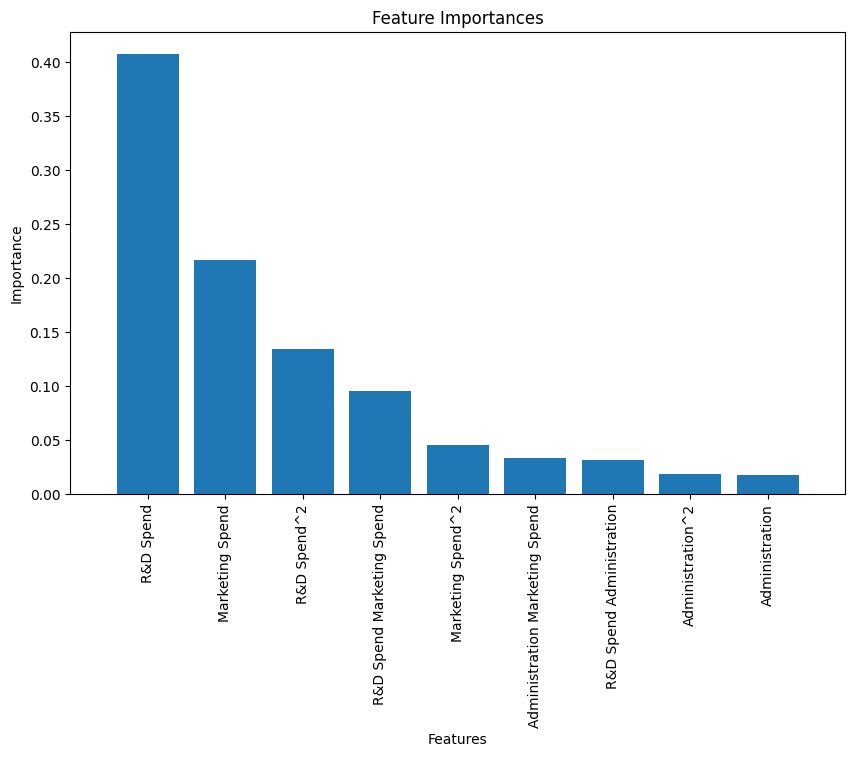

In [56]:
import matplotlib.pyplot as plt

# Get feature importances from the best model
importances = best_model.named_steps['rf'].feature_importances_

# If using PolynomialFeatures, get the feature names
if 'poly' in best_model.named_steps:
    poly = best_model.named_steps['poly']
    feature_names = poly.get_feature_names_out(input_features=X.columns)
else:
    feature_names = X.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [57]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate Ridge Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Ridge Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", mean_squared_error(y_test, y_pred_ridge, squared=False))
print("R² Score:", r2_score(y_test, y_pred_ridge))

Ridge Regression Performance:
MAE: 7340.298207954928
RMSE: 9142.498888996874
R² Score: 0.896781792943771


c:\Users\Keshavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [58]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)  # Alpha controls regularization
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate Lasso Regression
print("Lasso Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("RMSE:", mean_squared_error(y_test, y_pred_lasso, squared=False))
print("R² Score:", r2_score(y_test, y_pred_lasso))


Lasso Regression Performance:
MAE: 6978.418648934619
RMSE: 8994.835115366903
R² Score: 0.9000890952373657


c:\Users\Keshavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [59]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize ElasticNet with both L1 and L2 regularization
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # l1_ratio controls balance between Lasso and Ridge
elastic_net.fit(X_train, y_train)

# Predict
y_pred_elastic = elastic_net.predict(X_test)

# Evaluate ElasticNet Performance
print("ElasticNet Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_elastic))
print("RMSE:", mean_squared_error(y_test, y_pred_elastic, squared=False))
print("R² Score:", r2_score(y_test, y_pred_elastic))


ElasticNet Regression Performance:
MAE: 8746.949023284375
RMSE: 11166.341192419954
R² Score: 0.8460256902042118


c:\Users\Keshavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [60]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'alpha': [0.1, 1, 10, 100],  # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.7, 1.0]  # Balance between L1 (Lasso) and L2 (Ridge)
}

# Initialize ElasticNet
elastic_net = ElasticNet()

# Grid Search with Cross-Validation
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Best Parameters: {'alpha': 1, 'l1_ratio': 1.0}
Best R² Score: 0.9400626472041781
